In [ ]:
import pandas as pd
import csv
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

I split the data to **train**, **test** and **validation** sets.

In [3]:
df = pd.read_csv("/Users/Nika/Desktop/fashion-mnist_train.csv")
test_data = pd.read_csv("/Users/Nika/Desktop/fashion-mnist_test.csv")
mask = np.random.rand(len(df)) <= 0.83
train_data = df[mask]
validation_data = df[~mask]

In [4]:
x_train = df[mask]
y_train = x_train['label'].values
x_validation = df[~mask]
y_validation = x_validation['label'].values


I implement the **mlp classifier** and plot the **loss curve** using python packages as below:

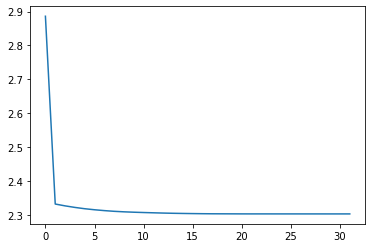

In [24]:
clf = MLPClassifier(solver = 'adam', learning_rate = "constant", learning_rate_init = 0.001, hidden_layer_sizes = (6, 4))
clf.fit(x_validation, y_validation)
loss_values_val = clf.loss_curve_
plt.plot(loss_values_val)
plt.show()

I plot the loss curve for **validation data** as below:

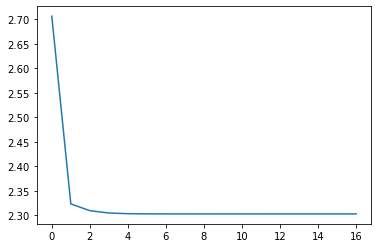

In [25]:
clf.fit(x_train, y_train)
loss_values = clf.loss_curve_
plt.plot(loss_values)
plt.show()

I calculate the accuracy of the model on test data as below:

In [26]:
predictions_test = clf.predict(test_data)
score_test = np.round(metrics.accuracy_score(test_data['label'].values, predictions_test),2)
print("accuracy =", str(score_test))

accuracy = 0.1


Next, I implement a **grid search** algorithm by testing the model with different solvers, learning rates, and number of hidden layers, as below:

number of hidden layers = 1 number of nodes in the layers = 50 solver = sgd learning rate = 0.001


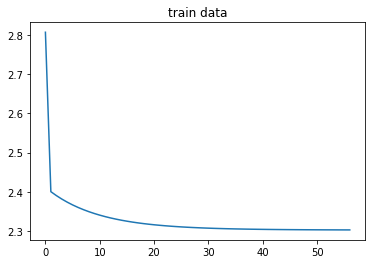

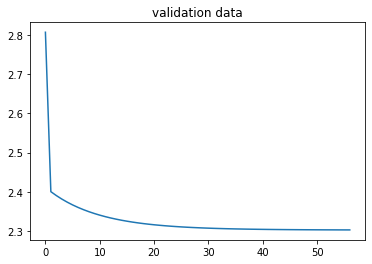

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = sgd learning rate = 0.01


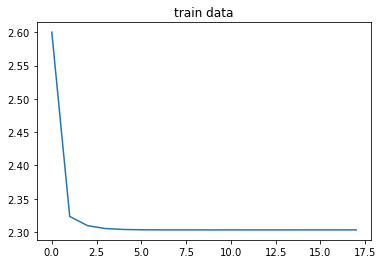

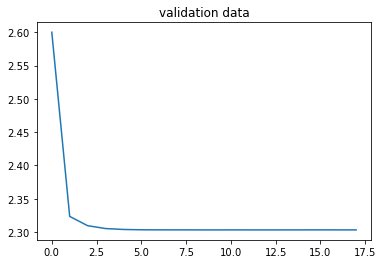

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = sgd learning rate = 0.1


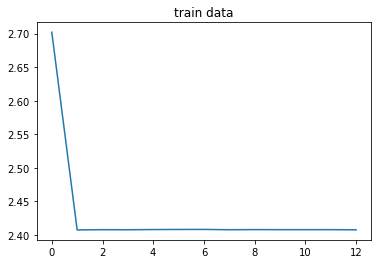

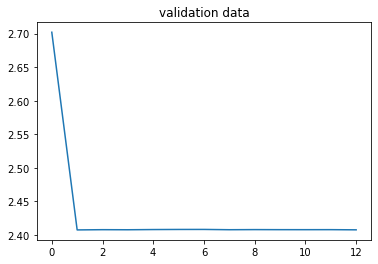

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = sgd learning rate = 0.5


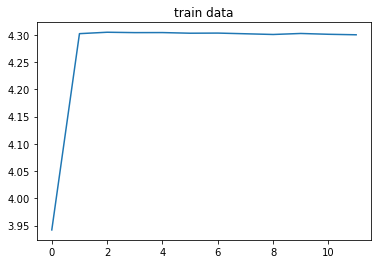

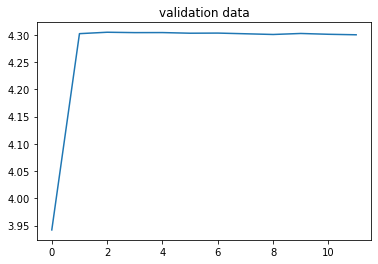

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = sgd learning rate = 0.9


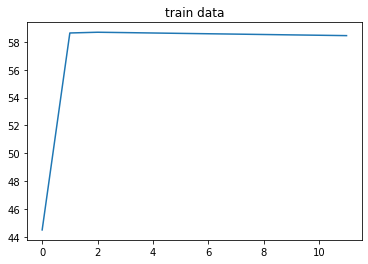

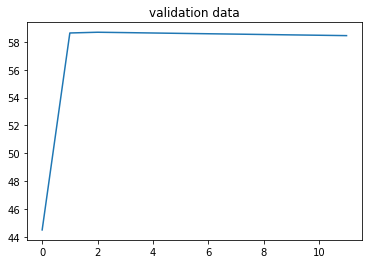

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = adam learning rate = 0.001


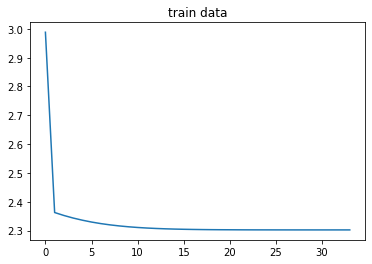

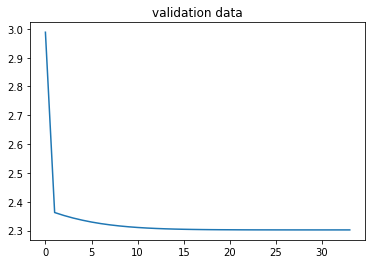

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = adam learning rate = 0.01


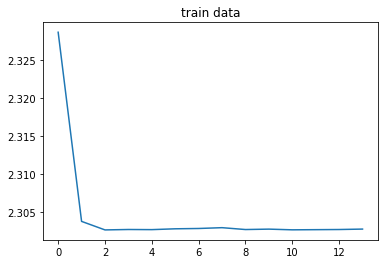

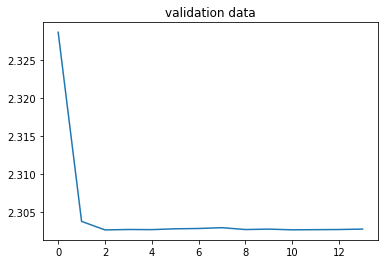

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = adam learning rate = 0.1


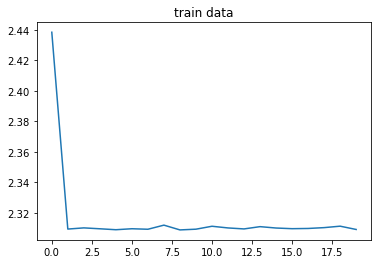

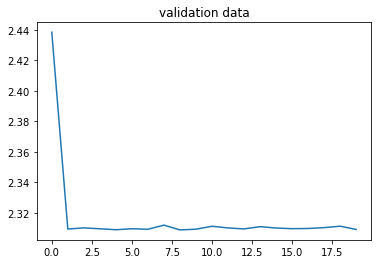

accuracy = 0.1
number of hidden layers = 1 number of nodes in the layers = 50 solver = adam learning rate = 0.5


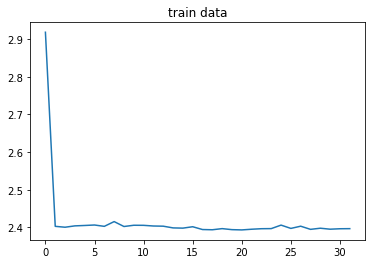

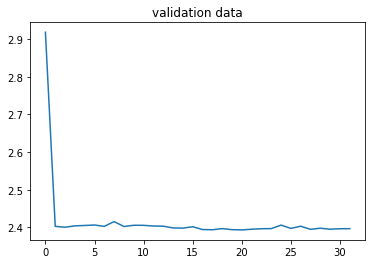

accuracy = 0.1


/Users/Nika/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [5]:
hidden_layers = [1, 2, 3, 4]
layer_nodes = [50, 100, 150]
solvers = ['sgd', 'adam', 'lbfgs']
learning_rate = [0.001, 0.01, 0.1, 0.5, 0.9]
for layers in hidden_layers:
    for nodes in layer_nodes:
        for Solver in solvers:
            for lr in learning_rate:
                clf = MLPClassifier(solver = Solver, learning_rate = "constant", learning_rate_init = lr, hidden_layer_sizes = (nodes, layers))
                clf.fit(x_train, y_train)
                clf.fit(x_validation, y_validation)
                loss_values = clf.loss_curve_
                print("number of hidden layers =",layers,"number of nodes in the layers =",nodes,"solver =",Solver, "learning rate =",lr)
                plt.plot(loss_values)
                plt.title("train data")
                plt.show()
                loss_values_val = clf.loss_curve_
                plt.plot(loss_values_val)
                plt.title("validation data")
                plt.show()
                predictions_test = clf.predict(test_data)
                score_test = np.round(metrics.accuracy_score(test_data['label'].values, predictions_test),2)
                print("accuracy =", str(score_test))
